<img src="logosimbolo1.gif" width="180" height="180" align="left"/>

<img src="logo_leam.png" width="160" height="460" align="right"/>

<font color='#006400' size=6 align='center'><p style='text-align: center;'>**Análisis y Tratamiento de Datos en Química**\
<font color=#8B2500 size=5><p style='text-align: center;'>**Enrique Mejía Ospino, emejia@uis.edu.co**\
<font color=#8B2500 size=5>         **Universidad Industrial de Santander**
---

<font color='navy' size=6><p style='text-align: justify;'>**Descargar y Leer Datos de un Archivo**

---

<font color='SteelBlue' size=4><p style='text-align: justify;'>**En esta sesión vamos a ver como descargar los datos de archivos en diferentes formatos, etre ellos los más comunes en ciencia de datos, `.csv`, `.txt`, `.xlsx`, etc.  Adicionalmente, veremos algunas formas de hacer inspección rápida de los datos. Utilizaremos los modulos `numpy` y `pandas` que son los más comunes en esta tarea.**

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**<font color='SteelBlue' size=4>Lectura de archivos planos (.txt) ubicados en una carpeta de su disco duro, utilizamos el modulo `numpy`en este caso.**

In [3]:
tio2=np.loadtxt('./Datos/tio88_1.txt')

In [5]:
tio2.shape # Un primera inspección podría ser conocer el tamaño del archivo de datos

(1024, 3)

**<font color='SteelBlue' size = 4>Podría Leer ese mismo tipo de archivos ubicado en algún lugar de la web.**

In [6]:
lugar2=('https://github.com/emejiao/Mass_Spectra3/raw/master/tio88_1.txt')
tio = np.loadtxt(lugar2)
tio.shape

(1024, 3)

In [7]:
tio

array([[6.10834e+02, 1.00000e+00, 2.18000e+02],
       [6.10869e+02, 1.00000e+00, 1.28000e+02],
       [6.10904e+02, 1.00000e+00, 8.30000e+01],
       ...,
       [6.46451e+02, 1.00000e+00, 1.00000e+03],
       [6.46486e+02, 1.00000e+00, 1.06900e+03],
       [6.46521e+02, 1.00000e+00, 1.23300e+03]])

In [10]:
tio[:, 0]

array([610.834, 610.869, 610.904, ..., 646.451, 646.486, 646.521])

In [6]:
lo=tio[:, 0]
In=tio[:, 2]

Text(0, 0.5, 'Intensidad (u. arb.)')

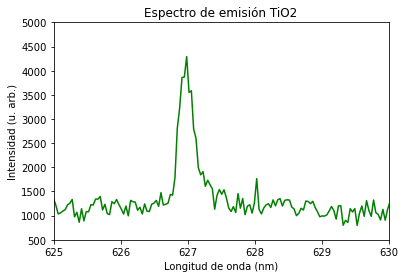

In [8]:
fig, ax = plt.subplots()

ax.plot(lo, In, 'g')
ax.set_xlim(625, 630)
ax.set_ylim(500, 5000)
ax.set_title("Espectro de emisión TiO2")
ax.set_xlabel("Longitud de onda (nm)")
ax.set_ylabel("Intensidad (u. arb.)")

**<font color='SteelBlue' size = 4>El modulo `numpy` permite leer archivos de formato `.csv`, utilizando el argumento `delimiter = ','`.**

In [13]:
lugar3=('https://github.com/emejiao/Mass_Spectra3/raw/master/cinco.CSV')
ir = np.loadtxt(lugar3, delimiter=',')
ir.shape

(7469, 2)

In [14]:
ir[:10]

array([[399.6813 ,   0.     ],
       [400.1635 ,  96.14223],
       [400.6456 ,  96.13872],
       [401.1277 ,  96.1713 ],
       [401.6098 ,  96.22102],
       [402.0919 ,  96.27351],
       [402.5741 ,  96.3223 ],
       [403.0562 ,  96.36977],
       [403.5383 ,  96.42246],
       [404.0204 ,  96.48585]])

In [15]:
Ab=2-np.log10(ir[1:, 1])
Ab

array([0.01708581, 0.01710166, 0.01695451, ..., 0.01267693, 0.01268618,
       0.01269745])

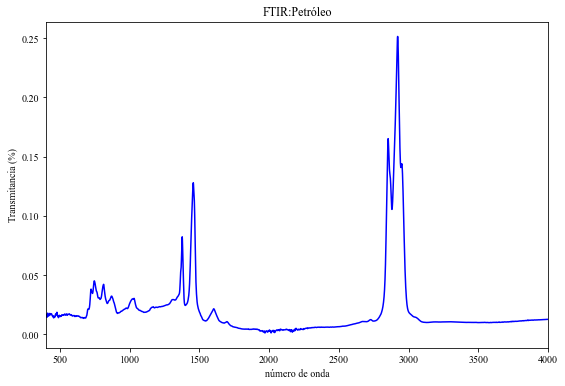

In [20]:
fig, ax= plt.subplots(figsize=(9,6))

plt.rcParams["font.family"] = 'Times New Roman'
ax.plot(ir[1:, 0], Ab, 'b') # En Absorbancia
ax.set_xlim(400, 4000)
#ax.set_ylim(40, 100)
ax.set_title("FTIR:Petróleo")
ax.set_xlabel("número de onda")
ax.set_ylabel("Transmitancia (%)")
fig.savefig("ir5.jpg", dpi = 140)

<font color = 'ForestGreen' size = 4><p style="text-align:justify">**Ahora vamos a revisar el uso de la librería `Pandas`. La estructura de datos básica de pandas se denomina DataFrame, que es una colección ordenada de columnas con nombres y tipos, parecido a una tabla de base de datos, donde una fila representa una observación o una muestra y las columnas representan atributos o características particulares.**

In [33]:
#Aquí leemos los datos de archivo excel ubicado como se indica aabajo
lugar6= ('https://github.com/emejiao/Mass_Spectra3/raw/master/AND1(APPI).xls')
anms = pd.read_excel(lugar6,sheet_name='Combined R. Abundances',index_col='Class')

<font color = 'ForestGreen' size = 4><p style="text-align:justify">**Si deseas saber todos los atributos que tiene la función `read_csv` o `read_excel`, puedes preguntar así:**

In [ ]:
pd.read_excel?

In [35]:
anms.head(8)

,R. Abundance,A.M.W. average,A.W. average C#,A.W. average DBE,A.W. average H/C
Class,,,,,
HC,41.500177,569.347057,41.971931,13.009065,1.542934
S1,6.997977,570.003806,39.894031,13.398517,1.558822
O1 -R,6.127822,593.205207,42.992651,15.658656,1.427401
N1 -R,3.699787,595.778990,43.458249,16.179416,1.371524
N2 O2 S1 -R,0.533891,593.303865,37.927453,17.318688,1.927552
Total,58.859654,573.978409,41.915051,13.672138,1.528435


In [36]:
#Aquí leemos otra hoja de cálculo del archivo excel ubicado como se indica abajo
anms1 = pd.read_excel(lugar6,sheet_name='General', header=2, index_col='Class')

In [37]:
anms1.head(10)

,Number of peaks,% R.A.,% R.A. \n (No Hits discarded),A.M.W. average,A.W. average C#,A.W. average DBE,A.W. average H/C,Sum R.A.
Class,,,,,,,,
Isolated,0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
No Hit,4294,17.309564,0.000000,NaN,NaN,NaN,NaN,NaN
13C1,135,0.731148,0.884199,445.540094,31.489489,7.143147,1.688561,475.830790
13C1 -R,1008,15.798091,19.105100,614.582481,44.240285,13.093377,1.596404,10281.391971
13C2 -R,466,2.623489,3.172664,625.920054,43.877013,11.371247,1.685167,1707.365911
HC,345,3.336432,4.034846,463.502373,34.036755,10.909265,1.599594,2171.348551
HC-R,1201,38.163746,46.152551,576.852821,42.530593,13.142299,1.537728,24836.952185
N1 -R,513,3.699787,4.474262,595.778990,43.458249,16.179416,1.371524,2407.819759
N1 13C1 -R,259,1.102924,1.333799,600.869226,42.612120,14.339564,1.454803,717.782700


---
<font color='red' size=20>**Lectura e Inspección**

<font color = 'ForestGreen' size = 4><p style="text-align:justify">**Podemos inspeccionar las primeras o las últimas filas de los datos usando la función `head()` o `tail()` de `pandas`**

In [42]:
anms1.head()

,Number of peaks,% R.A.,% R.A. \n (No Hits discarded),A.M.W. average,A.W. average C#,A.W. average DBE,A.W. average H/C,Sum R.A.
Class,,,,,,,,
Isolated,0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
No Hit,4294,17.309564,0.000000,NaN,NaN,NaN,NaN,NaN
13C1,135,0.731148,0.884199,445.540094,31.489489,7.143147,1.688561,475.830790
13C1 -R,1008,15.798091,19.105100,614.582481,44.240285,13.093377,1.596404,10281.391971
13C2 -R,466,2.623489,3.172664,625.920054,43.877013,11.371247,1.685167,1707.365911


In [43]:
anms1.tail()

,Number of peaks,% R.A.,% R.A. \n (No Hits discarded),A.M.W. average,A.W. average C#,A.W. average DBE,A.W. average H/C,Sum R.A.
Class,,,,,,,,
O1 13C1 -R,420,1.872744,2.264765,597.025753,42.063698,13.892110,1.502368,1218.781259
S1,152,0.816223,0.987082,532.101785,37.121404,23.473464,1.796665,531.197366
S1 -R,662,6.181754,7.475779,574.568860,40.220213,12.639139,1.521463,4023.083614
S1 13C1 -R,314,1.702386,2.058745,580.723053,39.492358,10.910263,1.587750,1107.911950
Total,10685,100.000000,100.000000,584.166083,42.341105,13.424069,NaN,65079.964668


<font color = 'ForestGreen' size = 4><p style="text-align:justify">**La función `columns` permite conocer el nombre de las columnas.**

In [38]:
anms1.columns 

Index(['Number of peaks', '% R.A.', '% R.A. \n (No Hits discarded)',
       'A.M.W. average', 'A.W. average C#', 'A.W. average DBE',
       'A.W. average H/C', 'Sum R.A.'],
      dtype='object')

<font color = 'ForestGreen' size = 4><p style="text-align:justify">**La función `axes` permite conocer el nombre de las columnas y las filas.**

In [39]:
anms1.axes

[Index(['Isolated', 'No Hit', '13C1 ', '13C1 -R', '13C2 -R', 'HC', 'HC-R',
        'N1 -R', 'N1 13C1 -R', 'N2 O2 S1 -R', 'O1 -R', 'O1 13C1 -R', 'S1 ',
        'S1 -R', 'S1 13C1 -R', 'Total'],
       dtype='object', name='Class'),
 Index(['Number of peaks', '% R.A.', '% R.A. \n (No Hits discarded)',
        'A.M.W. average', 'A.W. average C#', 'A.W. average DBE',
        'A.W. average H/C', 'Sum R.A.'],
       dtype='object')]

<font color = 'ForestGreen' size = 4><p style="text-align:justify">**Los nombres de las columnas actúan como índices que permiten su inspección.**

In [56]:
anms1[['% R.A.']] # Inspeccionar una columna en particular

,% R.A.
Class,
Isolated,0.000000
No Hit,17.309564
13C1,0.731148
13C1 -R,15.798091
13C2 -R,2.623489
HC,3.336432
HC-R,38.163746
N1 -R,3.699787
N1 13C1 -R,1.102924


<font color='blue' size=4>**Podemos leer varias hojas de cálculo del archivo excel, en este ejemplo leemos dos hojas de cálculo del archivo**

In [41]:
anms2 = pd.read_excel(lugar6,sheet_name=['HC', 'HC-R'], header=2)

<font color = 'blue' size = 4><p style="text-align:justify">**La función `keys` permite conocer el nombre de las hojas de cálculo leídas.**

In [42]:
anms2.keys()

dict_keys(['HC', 'HC-R'])

<font color='blue' size=4>**Podemos inspeccionar cada hoja de cálculo por su nombre**

In [43]:
anms2['HC-R'].head()

,Unnamed: 0,Exp. m/z,Recal m/z,Theor. Mass,Error,Rel. Abudance,DBE,Molecular Formula,Unnamed: 8,Unnamed: 9,Unnamed: 10,H/C
0,1,248.155946,248.155946,248.155952,0.026171,2.821380,10,C,19,H,20,1.052632
1,2,250.171598,250.171597,250.171602,0.019050,6.702846,9,C,19,H,22,1.157895
2,3,252.187251,252.187251,252.187252,0.006591,5.658992,8,C,19,H,24,1.263158
3,4,254.202904,254.202903,254.202902,-0.003367,14.707089,7,C,19,H,26,1.368421
4,5,256.124656,256.124655,256.124652,-0.010537,6.415286,13,C,20,H,16,0.800000


<font color='blue' size=4>**Y podemos inspeccionar cada columna dentro de cada hoja de cálculo por su nombre**

In [62]:
anms2['HC-R'][['Exp. m/z']].head()

,Exp. m/z
0,248.155946
1,250.171598
2,252.187251
3,254.202904
4,256.124656


<font color='blue'>**Podemos hacer una lectura sin necesidad de indicar las hojas de cálculo del archivo excel**

In [63]:
lugar6=('https://github.com/emejiao/Mass_Spectra3/raw/master/AND1(APPI).xls')
anms3 = pd.read_excel(lugar6,sheet_name=None, header=2)

In [64]:
anms3.keys() # y Luego determinar cuales y cuantas hojas de cálculo tiene el archivo utilizando la función keys

dict_keys(['General', 'Combined R. Abundances', 'No Hit', '13C1 ', '13C1 -R', '13C2 -R', 'HC', 'HC-R', 'N1 -R', 'N1 13C1 -R', 'N2 O2 S1 -R', 'O1 -R', 'O1 13C1 -R', 'S1 ', 'S1 -R', 'S1 13C1 -R'])

In [66]:
anms3['S1 -R'].head()

,Unnamed: 0,Exp. m/z,Recal m/z,Theor. Mass,Error,Rel. Abudance,DBE,Molecular Formula,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,H/C,S/C
0,1,254.112375,254.112374,254.112373,-0.003796,2.253087,9,C,17,H,18,S,1,1.058824,0.058824
1,2,262.081072,262.081071,262.081073,0.009009,3.475764,12,C,18,H,14,S,1,0.777778,0.055556
2,3,266.112340,266.112339,266.112373,0.127662,2.406715,10,C,18,H,18,S,1,1.000000,0.055556
3,4,268.128005,268.128004,268.128023,0.072896,2.281605,9,C,18,H,20,S,1,1.111111,0.055556
4,5,270.143679,270.143678,270.143673,-0.017377,2.611041,8,C,18,H,22,S,1,1.222222,0.055556


In [67]:
subset1= anms2['HC'][["DBE", "Molecular Formula", "Unnamed: 8", "Unnamed: 9", "Unnamed: 10", "H/C"]]
#De esta manera se puede tomar varias columnas

In [68]:
subset2= anms2['HC-R'][["DBE", "Molecular Formula", "Unnamed: 8", "Unnamed: 9", "Unnamed: 10", "H/C"]]
#De esta manera se puede tomar varias columnas

In [69]:
subset1.head()

,DBE,Molecular Formula,Unnamed: 8,Unnamed: 9,Unnamed: 10,H/C
0,4,C,18,H,30,1.666667
1,8,C,19,H,24,1.263158
2,7,C,19,H,26,1.368421
3,6,C,19,H,28,1.473684
4,12,C,20,H,18,0.900000
